In [1]:
import torch

In [2]:
x = torch.Tensor(2, 4)
x.shape

torch.Size([2, 4])

当requires_grad为true， 表示tensor需要自动微分，grad存储微分值， grad_fn表示微分函数，当叶子节点的require_grad为true时，中间节点都会变为true，只要在输出节点调用反向传播函数，就会自动求出叶子节点的微分值并存在grad中，只有叶子节点的grad能被更新

In [3]:
x = torch.ones(2)
x.requires_grad

False

In [4]:
print(x.grad, x.grad_fn)

None None


In [5]:
x.requires_grad = True # 只有这里设置为true，下面才会有grad_fn 

In [6]:
z = 4*x
z, z.grad_fn

(tensor([4., 4.], grad_fn=<MulBackward0>), <MulBackward0 at 0x7fb264781c00>)

In [7]:
y = z.norm()
y

tensor(5.6569, grad_fn=<LinalgVectorNormBackward0>)

In [8]:
y.backward()
x.grad, z.grad, y.grad

/tmp/ipykernel_37406/2587390850.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  x.grad, z.grad, y.grad


(tensor([2.8284, 2.8284]), None, None)

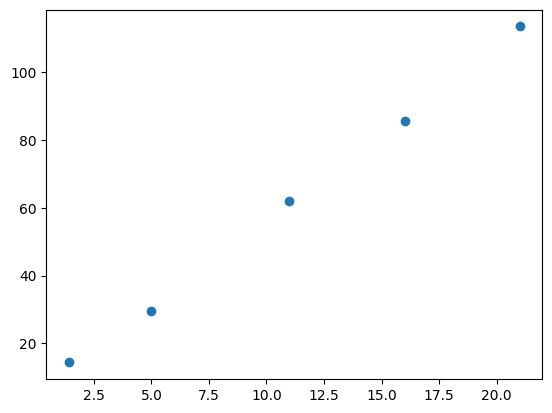

In [9]:
import torch
import matplotlib.pyplot as plt

#数据
x=torch.Tensor([1.4,5,11,16,21])
y=torch.Tensor([14.4,29.6,62,85.5,113.4])

#将x，y转化为numpy数据类型，绘制散点图
plt.scatter(x.numpy(),y.numpy())
plt.show()

In [10]:
#生成矩阵X
def Produce_X(x):
	x0 = torch.ones(x.numpy().size) #用ones产生初始值为1，大小与x相同的向量
	X = torch.stack((x,x0),dim=1)   #stack函数将两个向量拼合
	return X


x = torch.Tensor([1.4,5,11,16,21])
y = torch.Tensor([14.4,29.6,62,85.5,113.4])
X = Produce_X(x)

#定义权重w的变量
w = torch.rand(2,requires_grad=True)

inputs = X 
target = y

X.shape, y.shape, w.shape

(torch.Size([5, 2]), torch.Size([5]), torch.Size([2]))

In [11]:
def draw(output,loss):
	plt.cla()
	plt.scatter(x.numpy(), y.numpy())
	
	plt.plot(x.numpy(), output.data.numpy(),'r-', lw=5)
	plt.text(0.5, 0,'Loss=%s' % (loss.item()),fontdict={'size':20,'color':'red'})
	#plt.text(3, 9,'Loss=%s' % (loss.item()),fontdict={'size':20,'color':'red'})
	#plt.axis([10, 160, 0, 0.03])

	plt.pause(0.005)

#训练
def train(epochs=1,learning_rate=0.01):
	for epoch in range(epochs):

		#前向传播
		output = inputs.mv(w) #公式：y=Xw
		print(output)
		loss = (output - target).pow(2).sum()#公式：J = ∑(y-y')^2

		#反向传播
		loss.backward() 
		w.data -= learning_rate * w.grad  #更新权重w，公式：w_(t+1)= w_(t) - 𝜼*▽J

		w.grad.zero_() #清空grad的值

		if epoch % 80 == 0:
			draw(output,loss)

	#plt.savefig('plot1.png', format='png')

	return w,loss

tensor([0.1362, 0.2723, 0.4991, 0.6880, 0.8770], grad_fn=<MvBackward0>)


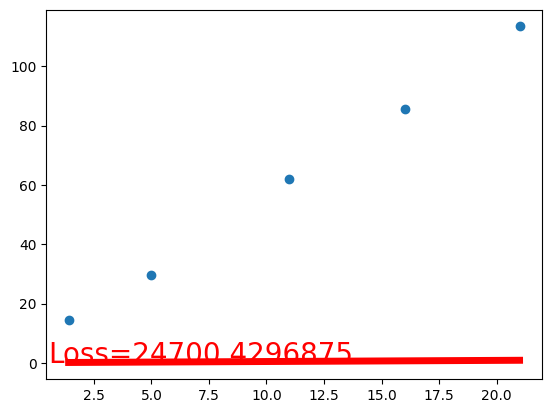

tensor([ 1.4744,  4.8959, 10.5983, 15.3504, 20.1025], grad_fn=<MvBackward0>)
tensor([ 2.5857,  8.7350, 18.9839, 27.5247, 36.0654], grad_fn=<MvBackward0>)
tensor([ 3.5087, 11.9229, 25.9466, 37.6330, 49.3195], grad_fn=<MvBackward0>)
tensor([ 4.2753, 14.5700, 31.7278, 46.0261, 60.3243], grad_fn=<MvBackward0>)
tensor([ 4.9121, 16.7681, 36.5281, 52.9948, 69.4615], grad_fn=<MvBackward0>)
tensor([ 5.4410, 18.5934, 40.5139, 58.7810, 77.0481], grad_fn=<MvBackward0>)
tensor([ 5.8805, 20.1091, 43.8234, 63.5853, 83.3473], grad_fn=<MvBackward0>)
tensor([ 6.2456, 21.3678, 46.5714, 67.5744, 88.5774], grad_fn=<MvBackward0>)
tensor([ 6.5490, 22.4131, 48.8531, 70.8865, 92.9199], grad_fn=<MvBackward0>)


In [12]:
w,loss = train(10,learning_rate = 1e-4) 

In [13]:
print(loss.item())

919.1204833984375


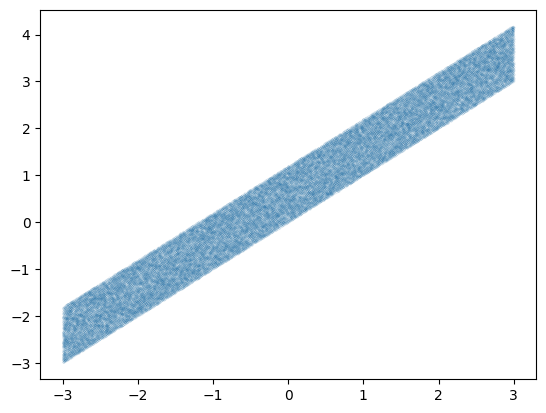

In [14]:
x = torch.linspace(-3,3,100000)#用linspace产生（-3，3）区间内的100000个点
X = Produce_X(x)
y = x +1.2*torch.rand(x.size())#假设真实函数是y=x，我们在上面增加一些误差，更加符合实际情况
w = torch.rand(2) #定义权重w的变量

#散点图查看样本数据的分布情况
plt.scatter(x.numpy(),y.numpy(),s=0.001)
plt.show()

In [15]:
torch.cuda.is_available()

True

In [26]:
from time import perf_counter

CUDA = torch.cuda.is_available()
if CUDA:
	inputs = X.cuda() 
	target = y.cuda()
	w = w.cuda()
	w.requires_grad=True
else:
	inputs = X 
	target = y
	w = w
	w.requires_grad=True

def draw(output,loss):
	#print loss
	if CUDA:
		output= output.cpu()
	plt.cla()
	plt.scatter(x.numpy(), y.numpy())
	plt.plot(x.numpy(), output.data.numpy(),'r-', lw=5)
	plt.text(0.5,0,'Loss=%s' % (loss.item()),fontdict={'size':20,'color':'red'})
	plt.pause(0.005)

def train(epochs=1,learning_rate=0.01):
	print(inputs.device, w.device) # tensor运行的device
	for epoch in range(epochs):

		#前向传播
		output = inputs.mv(w) #公式：y=Xw
		loss = (output - target).pow(2).sum()/100000 #公式：J = (∑(y-y')^2)/100000

		#反向传播
		loss.backward() 
		w.data -= learning_rate * w.grad  #更新权重w，公式：w_(t+1)= w_(t) - 𝜼*▽J
		w.grad.zero_() #清空grad的值
		
		
		# if epoch % 80 == 0:
		# 	draw(output,loss)
		

	return w,loss

start = perf_counter()
w,loss = train(10000,learning_rate=1e-4)  #学习率设置为1x10^(-4)
finish = perf_counter()
time = finish-start

print("计算时间:%s" % time)
print("final loss:",loss.item())
print("weights:",w.data)

cuda:0 cuda:0
计算时间:3.8266292759981297
final loss: 0.11985186487436295
weights: tensor([1.0008, 0.6013], device='cuda:0')


In [27]:
a = torch.linspace(-3, 3, 100000)
a.shape


torch.Size([100000])

In [29]:
# unsqueeze 就是在指定的dim上插入1维 
b = torch.unsqueeze(a, dim=0)
b.shape
# [1, 100000]

c = torch.unsqueeze(a, dim=1)
c.shape
#[10000, 1]

torch.Size([1, 100000])